#### Xây dựng mô hình Naïve ngây thơ trên tập dữ liệu mushroom.
Dữ liệu lấy tại
https://www.kaggle.com/datasets/uciml/mushroom-classification/data

#### 1. Import thư viện và nạp dữ liệu

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    precision_score,
    recall_score,
    f1_score
)

# Đọc dữ liệu nấm
data = pd.read_csv('Dataset/mushrooms.csv')

# Hiển thị 5 dòng đầu tiên
data.head()


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


#### 2. Khám phá & xử lý dữ liệu trước khi xây dựng mô hình

In [3]:
# Xem kích thước và thông tin dữ liệu
print("Shape:", data.shape)
print("\nColumns:", list(data.columns))

# Kiểm tra missing values
print("\nMissing values per column:")
print(data.isna().sum())


Shape: (8124, 23)

Columns: ['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']

Missing values per column:
class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring

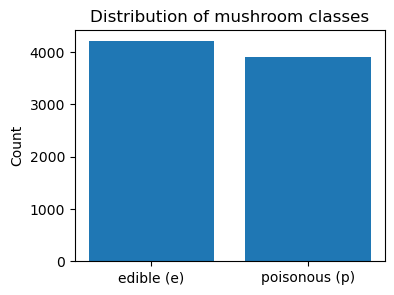

In [4]:
class_counts = data['class'].value_counts().sort_index()

plt.figure(figsize=(4,3))
plt.bar(['edible (e)', 'poisonous (p)'], class_counts.values)
plt.title('Distribution of mushroom classes')
plt.ylabel('Count')
plt.show()


#### 3. Mã hóa thuộc tính & tách tập train/test

In [6]:
# Tách X,y
# y là nhãn: edible / poisonous
y = data['class']

# X là tất cả các thuộc tính còn lại
X = data.drop('class', axis=1)

In [7]:
# One-Hot Encoding cho toàn bộ thuộc tính phân loại
# Mã hóa one-hot cho toàn bộ các cột phân loại
X_encoded = pd.get_dummies(X)

print("Số lượng features sau one-hot:", X_encoded.shape[1])
X_encoded.head()

# Chia train/test
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=y
)


Số lượng features sau one-hot: 117


#### 4. Xây dựng mô hình Naïve Bayes (MultinomialNB)

In [8]:
model = MultinomialNB()   # phù hợp dữ liệu one-hot / đếm

# Huấn luyện trên tập training
model.fit(X_train, y_train)

# Dự đoán nhãn trên tập test
y_pred = model.predict(X_test)

# (Mở rộng) Dự đoán xác suất mỗi mẫu thuộc từng lớp
y_prob = model.predict_proba(X_test)

print("First 5 predicted probabilities (P(edible), P(poisonous)):")
print(y_prob[:5])

First 5 predicted probabilities (P(edible), P(poisonous)):
[[2.93934614e-12 1.00000000e+00]
 [6.30769014e-01 3.69230986e-01]
 [9.99998306e-01 1.69421988e-06]
 [6.02297022e-12 1.00000000e+00]
 [1.49607800e-12 1.00000000e+00]]


#### 5. Đánh giá hiệu quả của mô hình

In [9]:
# 5.1 Độ chính xác tổng thể
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the Naïve Bayes model:", accuracy)

# 5.2 Ma trận nhầm lẫn
cm = confusion_matrix(y_test, y_pred, labels=['e', 'p'])
print("\nConfusion Matrix (rows = actual, cols = predicted):")
print(cm)

# Tách TN, FP, FN, TP nếu muốn phân tích thêm
tn, fp, fn, tp = cm.ravel()
print("\nConfusion Matrix details:")
print("True edible predicted edible (TN):", tn)
print("Edible predicted poisonous (FP):", fp)
print("Poisonous predicted edible (FN):", fn)
print("Poisonous predicted poisonous (TP):", tp)

# 5.3 Báo cáo phân loại chi tiết
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['edible', 'poisonous']))


Accuracy of the Naïve Bayes model: 0.9458461538461539

Confusion Matrix (rows = actual, cols = predicted):
[[835   7]
 [ 81 702]]

Confusion Matrix details:
True edible predicted edible (TN): 835
Edible predicted poisonous (FP): 7
Poisonous predicted edible (FN): 81
Poisonous predicted poisonous (TP): 702

Classification Report:
              precision    recall  f1-score   support

      edible       0.91      0.99      0.95       842
   poisonous       0.99      0.90      0.94       783

    accuracy                           0.95      1625
   macro avg       0.95      0.94      0.95      1625
weighted avg       0.95      0.95      0.95      1625



In [10]:
# Tính riêng Precision/Recall/F1 cho lớp “poisonous”
# Đổi nhãn sang 0/1 tạm thời để dễ tính cho lớp 'p'
y_test_binary = (y_test == 'p').astype(int)
y_pred_binary = (y_pred == 'p').astype(int)

precision_pos = precision_score(y_test_binary, y_pred_binary, pos_label=1)
recall_pos = recall_score(y_test_binary, y_pred_binary, pos_label=1)
f1_pos = f1_score(y_test_binary, y_pred_binary, pos_label=1)

print("Precision (poisonous=1):", precision_pos)
print("Recall (poisonous=1):", recall_pos)
print("F1-score (poisonous=1):", f1_pos)

Precision (poisonous=1): 0.9901269393511989
Recall (poisonous=1): 0.896551724137931
F1-score (poisonous=1): 0.9410187667560321


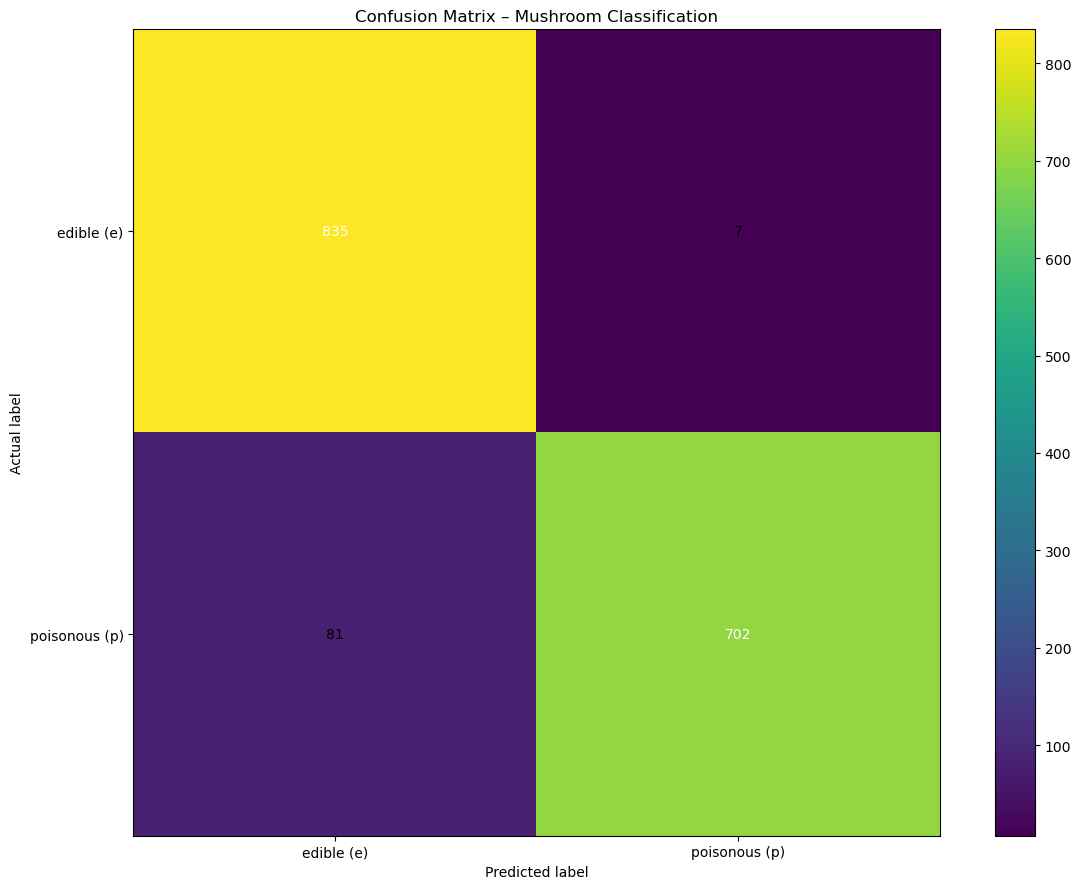

In [13]:
# Biểu đồ trực quan cho Confusion Matrix

plt.figure(figsize=(12,9))
plt.imshow(cm, interpolation='nearest')
plt.title('Confusion Matrix – Mushroom Classification')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['edible (e)', 'poisonous (p)'], rotation=0)
plt.yticks(tick_marks, ['edible (e)', 'poisonous (p)'])

thresh = cm.max() / 2.0
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 ha="center", va="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()
